<a href="https://colab.research.google.com/github/Chhaya-cloud/Chatbot/blob/main/EDA_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
'''
Question 1-> Import the data ds_salaries  into jupytier notebook and get an idea about the data.
'''
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
'''
Question-> Getting an idea about the duplicates in the dataset and treat them if necessary.
'''
df.duplicated().sum()

1171

In [6]:
'''
 Removing the duplicates from the dataset
'''
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
'''
Getting an idea whether there are any missing values in the dataset and treat them if necessary.
'''
df.isnull().sum().any()


False

In [ ]:
# False means there are no Null values.


In [6]:
'''
Getting an idea about the data types of the columns and comment if they are correct or not
'''
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


In [ ]:
'''
Conclusions -> 1) All the columns are in correct data types as expected.
'''


In [7]:
'''
Question 4->
Perform Statistical analysis on the data set and comment on it.
'''
df.describe().round(2)

,work_year,salary,salary_in_usd,remote_ratio
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


In [ ]:
'''
Conclusions -> 1) From the "Year" column  we can say that we have the  data from 2020 to 2023.
1) From the "Salary" and "Salary_in_usd" columns, mean is significantly greater than median, implying that there are outliers in the right tail.
3) From the "remote_ration" we can say that mean and median  are approximately same, implying that data is not skewed.

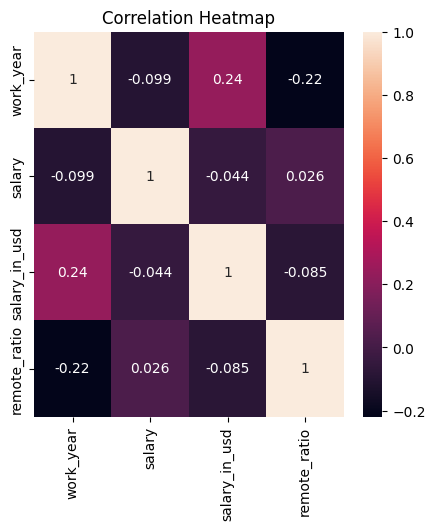

In [11]:
#Solution
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Conclusions->
1) "Salary_in_usd" and "work_year"  have a weak  positive correlation.
2) "work_year" and "remote_ration" have a weak negative correlation
3) "salary_in_usd" and "Work_year" are perfectly uncorrelated.

In [ ]:
'''
Question6-> Find the number of uniques job titles and display the top5 most frequent job titles.
'''


In [8]:
# Solution
# Get the number of unique job titles
print('Number of unique job titles:', df['job_title'].nunique())

Number of unique job titles: 93


In [13]:
# Display the top 5 most frequent job titles
df['job_title'].value_counts().head()


,count
job_title,
Data Engineer,598
Data Scientist,538
Data Analyst,396
Machine Learning Engineer,206
Analytics Engineer,91


In [ ]:
'''
Question7 ->
Plot the histogram of the "salary_in_usd" and comment on it.

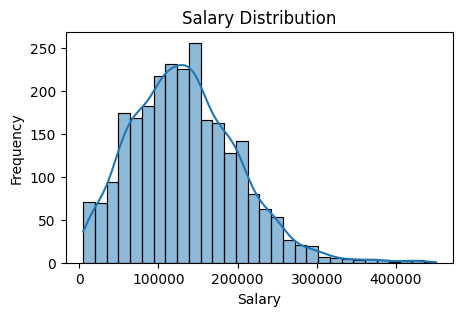

In [14]:
# SOlution:

plt.figure(figsize=(5,3))
sns.histplot(x=df['salary_in_usd'], bins=30, kde= True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# From the above plot we can say that data is approximately normally distributed.
# with a long right tail implying that there are outliers in right tail.

In [ ]:
'''
Question8 ->
Display the average salary for each job title  and comment on it.
'''

In [15]:
# Solution:

df.groupby('job_title')['salary_in_usd'].mean().round(2).sort_values(ascending= False)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
...,...
Autonomous Vehicle Technician,26277.50
3D Computer Vision Researcher,21352.25
Staff Data Analyst,15000.00


In [ ]:
'''
Question 9->
Display the average salary for each job title and sort it in descending order(without groupby)
'''

In [16]:
# Solution:
salary_sum = {}
count = {}
for _, row in df.iterrows():
  job=row['job_title']
  salary = row['salary_in_usd']

  if job in salary_sum:
    salary_sum[job] += salary
    count[job] += 1
  else:
    salary_sum[job] = salary
    count[job] = 1


In [17]:
# Calculating the average
avg_salaries = {job : {salary_sum[job] / count[job]} for job in salary_sum}

In [18]:
# Converting to dataframe
avg_salary_df = pd.DataFrame(avg_salaries.items(), columns= ['job_title', 'Avg salaries'])
avg_salary_df.head()

,job_title,Avg salaries
0,Principal Data Scientist,{198171.125}
1,ML Engineer,{158352.4411764706}
2,Data Scientist,{132974.5873605948}
3,Applied Scientist,{190342.5806451613}
4,Data Analyst,{105324.45454545454}


In [19]:
data = {'Job Title': ['Data Science Tech Lead', 'Cloud Data Architect', 'Data Lead', 'Data Analytics Lead', 'Principal Data Scientist', 'Autonomous Vehicle Technician', '3D Computer Vision Researcher','Staff Data Analyst', 'Product Data Scientist','Power BI Developer'],
        'Salary': [375000.00, 250000.00, 212500.00, 211254.50, 198171.12,26277.50,21352.25,15000.00, 8000.00, 5409.00]}

df = pd.DataFrame(data)

# Calculate total salary per job title
total_salary = {job: sum(df[df['Job Title'] == job]['Salary']) for job in df['Job Title'].unique()}

# Count occurrences of each job title
count_jobs = {job: sum(df['Job Title'] == job) for job in df['Job Title'].unique()}

# Compute average salary
avg_salary = {job: total_salary[job] / count_jobs[job] for job in total_salary}

# Convert to DataFrame and sort in descending order
avg_salary_df = pd.DataFrame(avg_salary.items(), columns=['Job Title', 'Average Salary'])
avg_salary_df = avg_salary_df.sort_values(by='Average Salary', ascending=False)

print(avg_salary_df)

                       Job Title  Average Salary
0         Data Science Tech Lead       375000.00
1           Cloud Data Architect       250000.00
2                      Data Lead       212500.00
3            Data Analytics Lead       211254.50
4       Principal Data Scientist       198171.12
5  Autonomous Vehicle Technician        26277.50
6  3D Computer Vision Researcher        21352.25
7             Staff Data Analyst        15000.00
8         Product Data Scientist         8000.00
9             Power BI Developer         5409.00


In [ ]:
'''
Question 10->
Plot  'company location' and 'Average Salary'
'''

In [9]:
# GEtting the column names
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [10]:
# Solution
#Data ->
print(df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False))



company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64


In [12]:
a = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

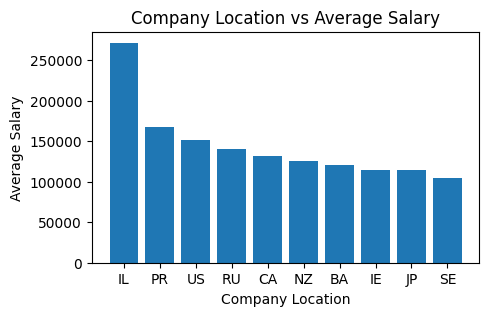

In [13]:
# Plot
plt.figure(figsize=(5,3))
plt.bar(a.index, a.values)
plt.title('Company Location vs Average Salary')
plt.xlabel('Company Location')
plt.ylabel('Average Salary')
plt.show()